# **Problem Statement**  
## **34. Apply early stopping to prevent overfitting in neural networks.**

Apply Early Stopping while training a Neural Network to prevent overfitting by stopping training when validation performance stops improving.

The goal is to:

- Train a neural network
- Monitor validation loss
- utomatically stop training at the optimal epoch
- Restore the best model weights

### Constraints & Example Inputs/Outputs

### Constraints
- Requires a validation set
- Early stopping depends on monitored metric
- Incorrect patience value may underfit or overfit
- Model must support callbacks

### Example Input:
```python
Dataset: Classification dataset
Model: Feedforward Neural Network
Metric: Validation loss

```

Expected Output:
```python
• Training stops before max epochs
• Validation loss stops decreasing
• Best weights restored

```

### Solution Approach

**Step 1: Prepare Dataset**
- Split data into train / validation / test sets.

**Step 2: Build Neural Network**
- Use a simple Dense ANN that can easily overfit.

**Step 3: Apply Early Stopping**
Monitor:
- val_loss
- Stop after patience epochs
- Restore best weights

**Step 4: Evaluate Model**
Compare:
- Training loss
- Validation loss
- Test accuracy

### Solution Code

In [2]:
# Approach 1: Brute Force: No Early Stopping (Overfitting Example)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load & Prepare Data
X, y = load_breast_cancer(return_X_y=True)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build & Train Model (No Early Stopping)
model_no_es = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_no_es.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_no_es = model_no_es.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    verbose=0
)


/home/piai/jupyter_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1767627193.394162  280717 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### Alternative Solution

In [3]:
# Approach 2: Optimized: Apply Early Stopping Callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

model_es = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_es.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_es = model_es.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    callbacks=[early_stopping],
    verbose=0
)



### Alternative Approaches

**Brute Force**
- Limit number of epochs manually
- Reduce model size

**Optimized**
- Early Stopping ✅
- Dropout
- L1/L2 Regularization
- Data Augmentation

### Test Case

In [9]:
# Test Case 1: Check Number of Epochs Used
len(history_es.history['loss'])

19

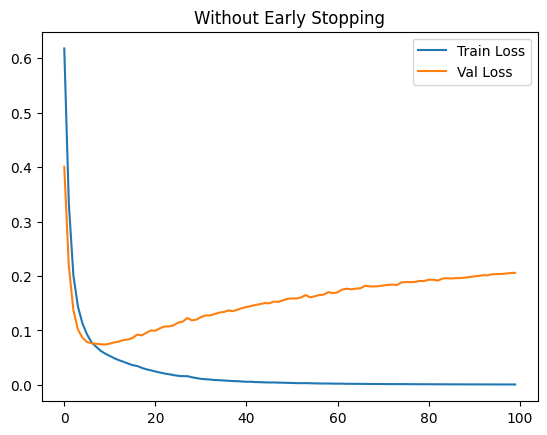

In [8]:
# Test Case 2: Plot Training vs Validation Loss (No Early Stopping)
plt.plot(history_no_es.history['loss'], label='Train Loss')
plt.plot(history_no_es.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Without Early Stopping")
plt.show()


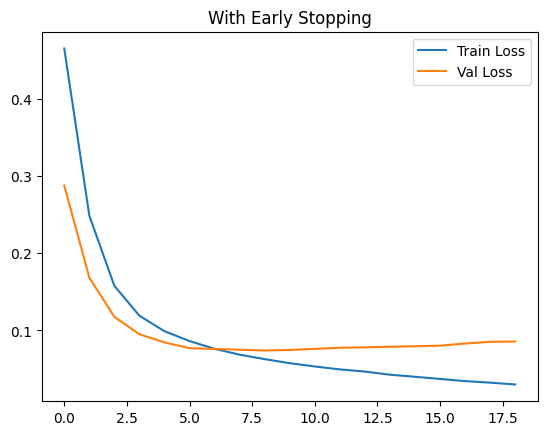

In [6]:
# Test Case 3: Plot Training vs Validation Loss (With Early Stopping)
plt.plot(history_es.history['loss'], label='Train Loss')
plt.plot(history_es.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("With Early Stopping")
plt.show()


In [7]:
# Test Case 4: Evaluate on Test Set
test_loss, test_acc = model_es.evaluate(X_test, y_test, verbose=0)
test_acc


1.0

### Expected Outputs
- Training stops early
- Best weights restored
- Reduced overfitting
- Stable validation loss
- Improved test performance

## Complexity Analysis

### Without Early Stopping
- Time: O(E × N × P)
- Space: O(P)

### With Early Stopping
- Time: O(E' × N × P), where E' < E
- Space: O(P)


#### Thank You!!